In [12]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

data = pd.read_csv("./ted-talks/ted_main.csv", error_bad_lines=False)  # Getting the data

<BarContainer object of 10 artists>

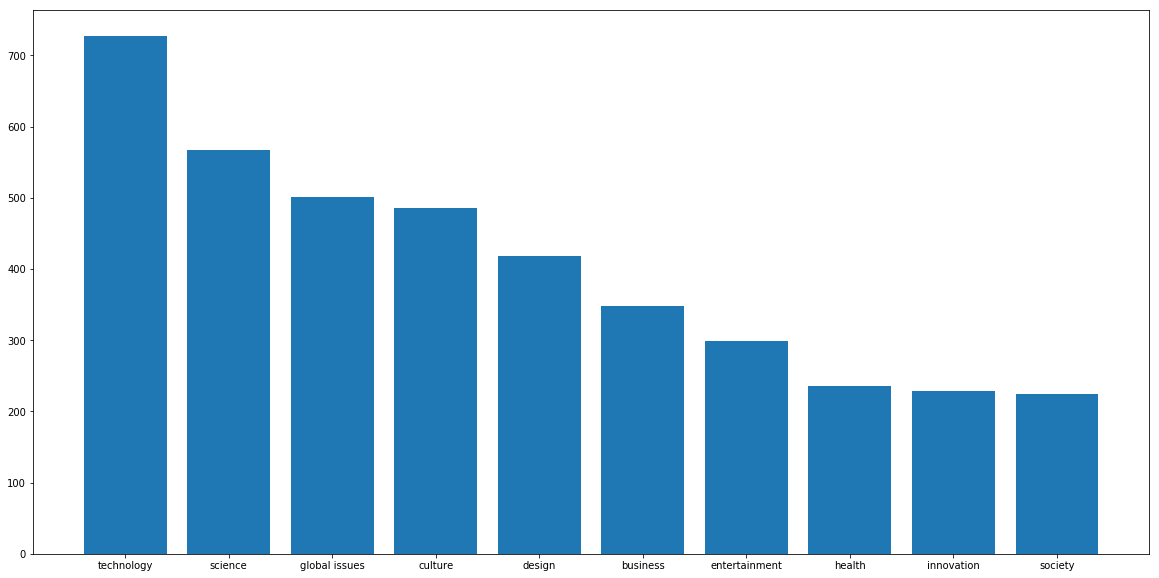

In [13]:
words = {}
tags_set = [eval(_) for _ in data['tags']]
for tags in tags_set:
    for tag in tags:
        tag = tag.lower()
        if tag in words.keys() and tag != "tedx":
            words[tag] += 1
        else:
            words[tag] = 1

tags, freq = zip(*Counter(words).most_common(10))
plt.bar(tags, freq)

In [3]:
data_desc = data['description']

documentos = data_desc

## Visualizando parte de los datos

In [4]:
print(len(documentos))
print(documentos[:5])

2550
0    Sir Ken Robinson makes an entertaining and pro...
1    With the same humor and humanity he exuded in ...
2    New York Times columnist David Pogue takes aim...
3    In an emotionally charged talk, MacArthur-winn...
4    You've never seen data presented like this. Wi...
Name: description, dtype: object


In [5]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/umoqnier/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Funciones para preprocesamiento, lematización y stemming

In [6]:

def lematizacion_stemming(texto):
    stemmer = SnowballStemmer('english')
    return stemmer.stem(WordNetLemmatizer().lemmatize(texto, pos='v'))

def preprocesamiento(texto):
    return [lematizacion_stemming(token) for token in simple_preprocess(texto) 
            if token not in STOPWORDS and len(token) > 3]

In [62]:
ejemplo = documentos.iloc[2000]
print("Documento original\n", " | ".join(ejemplo.split(' ')))
print("\n\nDocumento preprocesado\n", " | ".join(preprocesamiento(ejemplo)))

Documento original
 Raised | listening | to | his | dad's | old | records, | Joey | Alexander | plays | a | brand | of | sharp, | modern | piano | jazz | that | you | likely | wouldn't | expect | to | hear | from | a | pre-teenager. | Listen | as | the | 11-year-old | delights | the | TED | crowd | with | his | very | special | performance | of | a | Thelonious | Monk | classic.


Documento preprocesado
 rais | listen | record | joey | alexand | play | brand | sharp | modern | piano | jazz | like | wouldn | expect | hear | teenag | listen | year | delight | crowd | special | perform | theloni | monk | classic


In [8]:
documentos_preprocesados = documentos.map(preprocesamiento)
documentos_preprocesados[:10]

0    [robinson, make, entertain, profound, move, ca...
1    [humor, human, exud, inconveni, truth, gore, s...
2    [york, time, columnist, david, pogu, take, tec...
3    [emot, charg, talk, macarthur, win, activist, ...
4    [see, data, present, like, drama, urgenc, spor...
5    [toni, robbin, discuss, invis, forc, motiv, ac...
6    [young, mormon, missionari, knock, julia, swee...
7    [architect, joshua, princ, ramus, take, audien...
8    [philosoph, dennett, call, religion, religion,...
9    [pastor, rick, warren, author, purpos, drive, ...
Name: description, dtype: object

# Bolsa de palabras

In [70]:
diccionario = gensim.corpora.Dictionary(documentos_preprocesados)

j = 0
for key, value in diccionario.iteritems():
    print(key, value)
    j += 1
    if j >= 10:
        break
    

0 case
1 creat
2 creativ
3 educ
4 entertain
5 make
6 move
7 nurtur
8 profound
9 robinson


## Filtrando los tokens

In [ ]:
diccionario.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

Por cada documento se crea un diccionario las palabras del corpus y cuantas veces apararecen

In [73]:
bow_corpus = [diccionario.doc2bow(doc) for doc in documentos_preprocesados]
bow_corpus[2000]

[(12, 1),
 (79, 1),
 (185, 1),
 (220, 1),
 (592, 1),
 (726, 1),
 (920, 1),
 (989, 1),
 (1019, 2),
 (1048, 1),
 (1075, 1),
 (1079, 1),
 (1393, 1),
 (1550, 1),
 (2123, 1),
 (2653, 1),
 (2814, 1),
 (2955, 1),
 (2990, 1),
 (3373, 1),
 (5227, 1),
 (5266, 1),
 (5838, 1),
 (8688, 1)]

### Reporte simple

In [74]:
for i in range(len(bow_corpus[2000])):
    print("La palabra #{} ('{}') aparece {} veces".format(bow_corpus[2000][i][0],
                                                         diccionario[bow_corpus[2000][i][0]],
                                                         bow_corpus[2000][i][1]))

La palabra #12 ('brand') aparece 1 veces
La palabra #79 ('like') aparece 1 veces
La palabra #185 ('year') aparece 1 veces
La palabra #220 ('perform') aparece 1 veces
La palabra #592 ('hear') aparece 1 veces
La palabra #726 ('modern') aparece 1 veces
La palabra #920 ('play') aparece 1 veces
La palabra #989 ('record') aparece 1 veces
La palabra #1019 ('listen') aparece 2 veces
La palabra #1048 ('piano') aparece 1 veces
La palabra #1075 ('special') aparece 1 veces
La palabra #1079 ('delight') aparece 1 veces
La palabra #1393 ('wouldn') aparece 1 veces
La palabra #1550 ('monk') aparece 1 veces
La palabra #2123 ('classic') aparece 1 veces
La palabra #2653 ('rais') aparece 1 veces
La palabra #2814 ('expect') aparece 1 veces
La palabra #2955 ('sharp') aparece 1 veces
La palabra #2990 ('jazz') aparece 1 veces
La palabra #3373 ('crowd') aparece 1 veces
La palabra #5227 ('teenag') aparece 1 veces
La palabra #5266 ('joey') aparece 1 veces
La palabra #5838 ('alexand') aparece 1 veces
La palabra #8

## TF-IDF

In [26]:
from gensim import corpora, models
from pprint import pprint

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.21465014128259877),
 (1, 0.1649098661508854),
 (2, 0.2229471962836048),
 (3, 0.23833223951022692),
 (4, 0.3090847303416881),
 (5, 0.16110176037451798),
 (6, 0.222147164970131),
 (7, 0.4015066027030471),
 (8, 0.2978560771101186),
 (9, 0.3798372211731492),
 (10, 0.5051571282959756)]


# Usando LDA con Bag of Words

In [76]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=diccionario, passes=2, workers=2)
print("* LDA - BoW *\n\n")
for t_id, topico in lda_model.print_topics(-1):
    print("Topico #{}\nPalabras: {}\n\n".format(t_id, topico))

* LDA - BoW *


Topico #0
Palabras: 0.009*"world" + 0.009*"talk" + 0.005*"share" + 0.005*"say" + 0.005*"peopl" + 0.004*"like" + 0.004*"time" + 0.004*"live" + 0.004*"learn" + 0.004*"power"


Topico #1
Palabras: 0.012*"talk" + 0.009*"world" + 0.009*"share" + 0.008*"like" + 0.005*"life" + 0.005*"say" + 0.004*"need" + 0.004*"help" + 0.004*"show" + 0.004*"human"


Topico #2
Palabras: 0.008*"build" + 0.007*"design" + 0.006*"learn" + 0.005*"talk" + 0.005*"world" + 0.005*"share" + 0.005*"year" + 0.004*"human" + 0.004*"stori" + 0.004*"problem"


Topico #3
Palabras: 0.015*"talk" + 0.006*"time" + 0.005*"world" + 0.005*"say" + 0.005*"help" + 0.004*"data" + 0.004*"start" + 0.004*"think" + 0.004*"show" + 0.004*"live"


Topico #4
Palabras: 0.014*"talk" + 0.007*"help" + 0.006*"share" + 0.006*"peopl" + 0.006*"stori" + 0.005*"power" + 0.005*"show" + 0.005*"think" + 0.005*"say" + 0.005*"year"


Topico #5
Palabras: 0.011*"talk" + 0.009*"human" + 0.008*"say" + 0.007*"peopl" + 0.006*"work" + 0.006*"show" + 

## Usando LDA con TFIDF

In [33]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=diccionario, passes=2, workers=4)
print("* LAD - TFIDF *\n\n")
for t_id, topico in lda_model_tfidf.print_topics(-1):
    print("Topico #{}\nPalabras: {}\n\n".format(t_id, topico))

* LAD - TFIDF *


Topico #0
Palabras: 0.002*"world" + 0.002*"talk" + 0.002*"share" + 0.002*"human" + 0.002*"design" + 0.001*"say" + 0.001*"question" + 0.001*"women" + 0.001*"right" + 0.001*"help"


Topico #1
Palabras: 0.002*"talk" + 0.002*"brain" + 0.002*"work" + 0.001*"world" + 0.001*"stori" + 0.001*"peopl" + 0.001*"power" + 0.001*"show" + 0.001*"cultur" + 0.001*"share"


Topico #2
Palabras: 0.002*"world" + 0.002*"talk" + 0.002*"learn" + 0.001*"like" + 0.001*"share" + 0.001*"come" + 0.001*"work" + 0.001*"life" + 0.001*"data" + 0.001*"stori"


Topico #3
Palabras: 0.002*"share" + 0.002*"talk" + 0.002*"design" + 0.002*"world" + 0.002*"live" + 0.002*"human" + 0.002*"power" + 0.002*"like" + 0.002*"life" + 0.001*"know"


Topico #4
Palabras: 0.002*"talk" + 0.002*"show" + 0.002*"think" + 0.002*"life" + 0.002*"peopl" + 0.001*"world" + 0.001*"share" + 0.001*"help" + 0.001*"say" + 0.001*"look"


Topico #5
Palabras: 0.002*"design" + 0.002*"world" + 0.002*"talk" + 0.002*"creat" + 0.002*"work" + 0.

## Evaluación usando BoW

In [59]:
print(" | ".join(documentos_preprocesados[2000]))
for i, puntuacion in sorted(lda_model[bow_corpus[2000]], key=lambda tup: -1 * tup[1]):
    print("\nPuntuación {}\t\nTopico: {}".format(puntuacion, lda_model.print_topic(i, 10)))

rais | listen | record | joey | alexand | play | brand | sharp | modern | piano | jazz | like | wouldn | expect | hear | teenag | listen | year | delight | crowd | special | perform | theloni | monk | classic

Puntuación 0.9653603434562683	
Topico: 0.009*"talk" + 0.007*"stori" + 0.007*"world" + 0.006*"live" + 0.006*"say" + 0.005*"share" + 0.005*"educ" + 0.005*"help" + 0.005*"peopl" + 0.005*"like"


## Evaluación usando TFIDF

In [61]:
for index, score in sorted(lda_model_tfidf[bow_corpus[2000]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.8514209389686584	 
Topic: 0.002*"world" + 0.002*"talk" + 0.002*"learn" + 0.001*"like" + 0.001*"share" + 0.001*"come" + 0.001*"work" + 0.001*"life" + 0.001*"data" + 0.001*"stori"

Score: 0.11774303019046783	 
Topic: 0.002*"talk" + 0.002*"share" + 0.002*"data" + 0.002*"human" + 0.002*"think" + 0.002*"world" + 0.002*"time" + 0.002*"look" + 0.002*"say" + 0.002*"peopl"


## Pruebas con documentos no vistos

In [63]:
documento_nuevo = "With the recent research Ximena from Elotl community makes the great book compilation of original local languages"
bow_vector = diccionario.doc2bow(preprocesamiento(documento_nuevo))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.5660471320152283	 Topic: 0.011*"human" + 0.010*"talk" + 0.010*"world" + 0.009*"share" + 0.005*"say"
Score: 0.36117714643478394	 Topic: 0.009*"talk" + 0.007*"stori" + 0.007*"world" + 0.006*"live" + 0.006*"say"


Notas basadas fuertemente en este [articulo](https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24)